# Part 1: Use synthetic data for training

In [ ]:
from funtions import clean_maze_dataset, generate_maze_dataset, example_mazes
from cnn_encode import convert_and_save_solutions_to_grids, display_sample_mazes, load_dataset_multichannel, display_example_multichannel
from cnn_encode import train_and_evaluate, plot_training_history, visualize_maze_comparison
from cnn_no_encode import process_and_train_no_encode, evaluate_on_new_data_no_encode
from cnn_rl import solve_maze

import numpy as np
import os
import random

Generating mazes: 100%|██████████| 1/1 [00:00<00:00, 22.96it/s]

Successfully generated 1 maze images in 


**Problem:** We have 10 unsolved 9x9 mazes. Our goal is to predict correctly 10 out of 10 mazes

**Question:** What is the best way to solve mazes using deep learning?

# APPROACH 1

In this approach, we designed a maze generator with customizable sizes, producing 2,000 maze images and 2,000 solution images. The use these data to train our CNN model

All files in the maze_dataset have been successfully removed.


Generating mazes: 100%|██████████| 2000/2000 [00:57<00:00, 34.65it/s]

Successfully generated 2000 maze images in maze_dataset


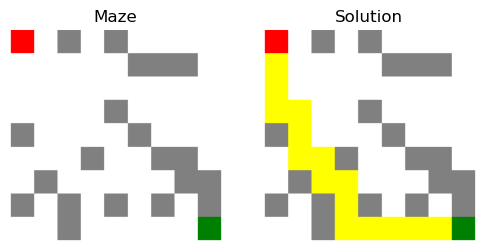

In [ ]:
# Clean, Generate data and show example mazes, comment this after run firsttime. 
# This will only takes 16 to 20 MB in storage
clean_maze_dataset()
generate_maze_dataset(num_mazes=2000, size=9, wall_prob=0.3, output_dir="maze_dataset")
example_mazes(1)

## TRIAL 1

Basically here we tried feeding the cnn with raw data (with resize), the model performed badly

Maze solver model created with BatchNorm and Dropout


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 27, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,651 (733.01 KB)

 Trainable params: 187,011 (730.51 KB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.3432 - loss: 0.5145 - val_accuracy: 0.1981 - val_loss: 0.4328
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.2422 - loss: 0.3115 - val_accuracy: 0.1618 - val_loss: 0.3361
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.2195 - loss: 0.2911 - val_accuracy: 0.1020 - val_loss: 0.2898
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.2070 - loss: 0.2840 - val_accuracy: 0.1917 - val_loss: 0.2726
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.2080 - loss: 0.2796 - val_accuracy: 0.1946 - val_loss: 0.2746
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.1942 - loss: 0.2755 - val_accuracy: 0.2890 - val_loss: 0.2673
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.2023 - loss: 0.2722 - val_accuracy: 0.2964 - val_loss: 0.2719
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.1978 - loss: 0.2718 - val_accu

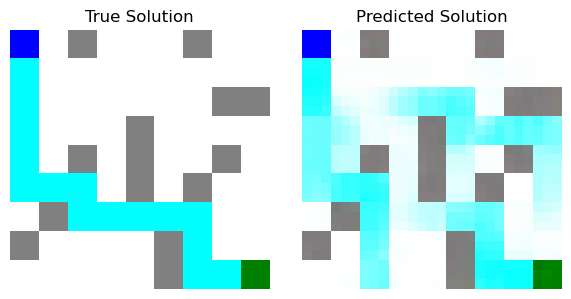

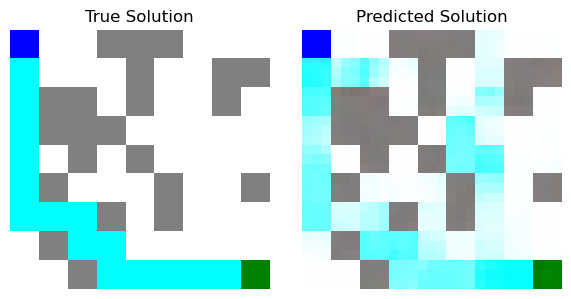

In [3]:
mazes_dir = "maze_dataset/mazes"
solutions_dir = "maze_dataset/solutions"
model_no_encode = process_and_train_no_encode(mazes_dir, solutions_dir, epochs=10, batch_size=8, num_samples=2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


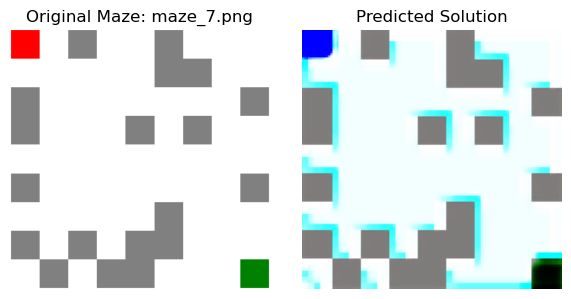

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


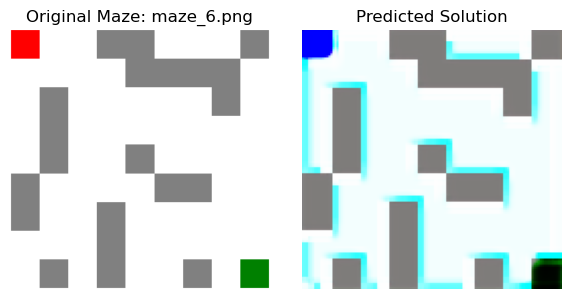

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


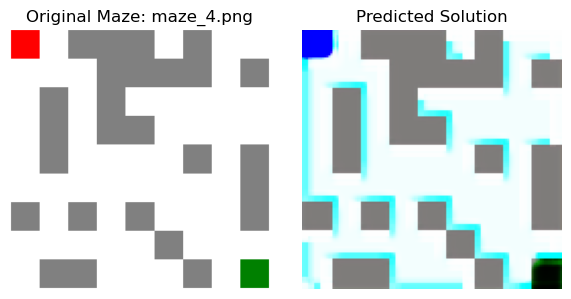

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


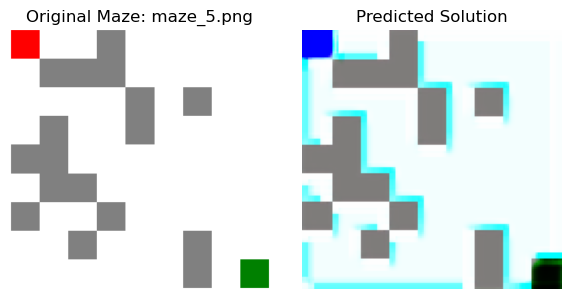

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


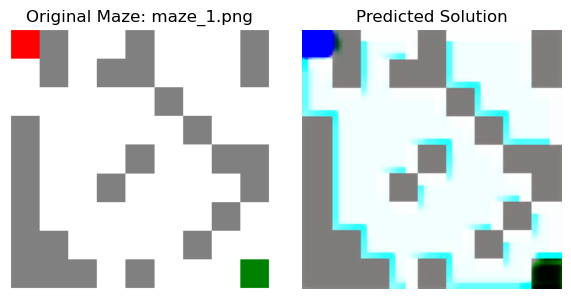

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


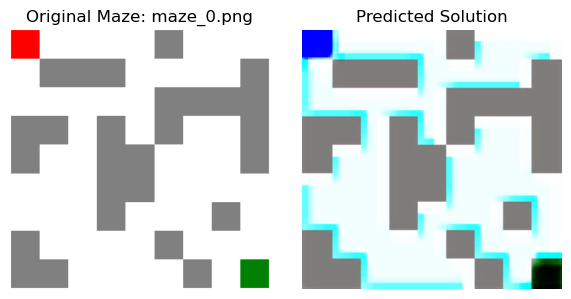

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


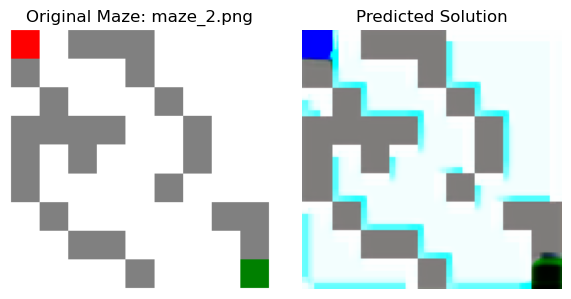

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


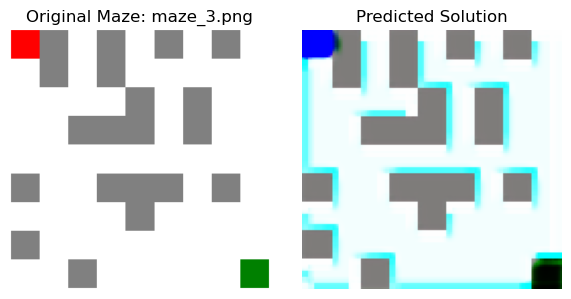

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


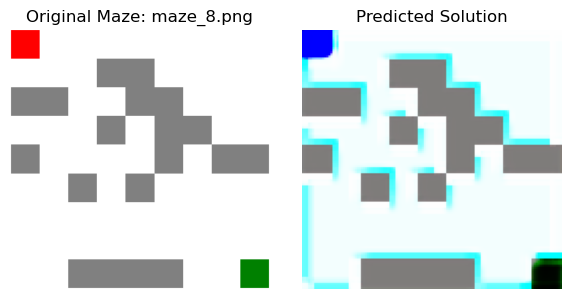

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


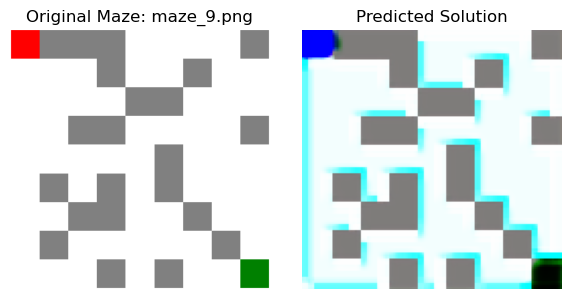

In [4]:
test_mazes_dir = "real_dataset/mazes"
evaluate_on_new_data_no_encode(model_no_encode, test_mazes_dir)

### Conclusion: Doesn't work

## TRIAL 2

Here we do encoding for each element in the maze (Walls, Start, Goal, Path). The model worked decent

Converting 2000 solution images to grids...


100%|██████████| 2000/2000 [00:07<00:00, 262.81it/s]


Conversion complete. Grids saved to maze_dataset/grids


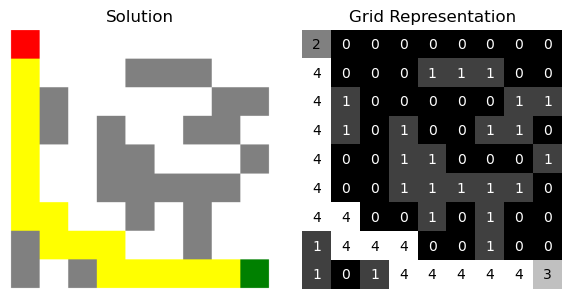

Displayed solution_995


In [5]:
# Define directories
mazes_dir = "maze_dataset/mazes"
solutions_dir = "maze_dataset/solutions"
grids_dir = "maze_dataset/grids"
    
#Convert solution images to grids and save them
convert_and_save_solutions_to_grids(solutions_dir, grids_dir)
    
# Display sample maze solutions with their grid representations
display_sample_mazes(solutions_dir, grids_dir, 1)

In [6]:
grid_files = [f for f in os.listdir(grids_dir) if f.endswith('.npy')]
print(f"Found {len(grid_files)} grid files")
    
if len(grid_files) == 0:
    raise ValueError(f"No grid files found in {grids_dir}")
    
sample_grid = np.load(os.path.join(grids_dir, grid_files[0]))
grid_size = sample_grid.shape[0]
print(sample_grid)

Found 2000 grid files
[[2 0 0 0 0 0 0 0 0]
 [4 1 0 0 0 1 1 0 0]
 [4 1 0 1 1 0 0 1 0]
 [4 0 1 0 0 0 0 1 0]
 [4 4 4 0 1 0 1 0 0]
 [0 1 4 1 0 0 1 0 1]
 [1 0 4 1 1 1 0 0 0]
 [0 1 4 0 0 0 0 1 0]
 [0 0 4 4 4 4 4 4 3]]


Loading dataset from: maze_dataset/grids
Found 2000 grid files
Using 2000 from grid files


Loading grids: 100%|██████████| 2000/2000 [00:00<00:00, 22140.31it/s]


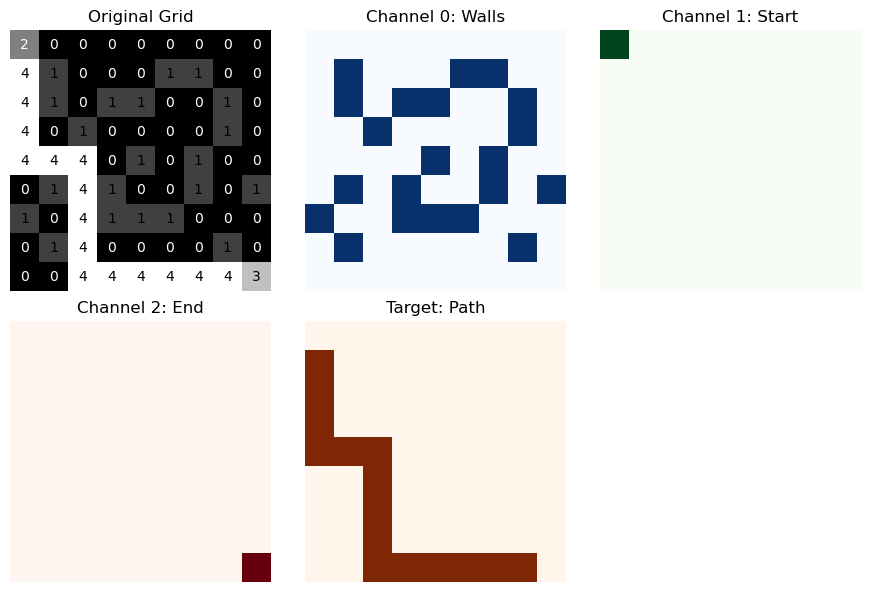

In [7]:
X, y, grid_files = load_dataset_multichannel(grids_dir, num_grids=2000)

# Display the first example
display_example_multichannel(grid_files[0], X, y, index=0, grids_dir=grids_dir)

In [8]:
display(type(X))
print(X.shape)
random_index = random.randint(0, X.shape[0] - 1)
sample = X[random_index]
print(f"Grid_{random_index}")

walls = sample[:, :, 0]
start_point = sample[:, :, 1]
end_point = sample[:, :, 2]
empty_spaces = sample[:, :, 3]

print("Walls (Channel 0):")
print(walls)

print("\nStart Point (Channel 1):")
print(start_point)

print("\nEnd Point (Channel 2):")
print(end_point)

print("\nEmpty Spaces (Channel 3):")
print(empty_spaces)

numpy.ndarray

(2000, 9, 9, 4)
Grid_267
Walls (Channel 0):
[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]

Start Point (Channel 1):
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

End Point (Channel 2):
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Empty Spaces (Channel 3):
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 9, 9, 32)       │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 9, 9, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 9, 9, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 9, 9, 1)        │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,105 (730.88 KB)

 Trainable params: 186,465 (728.38 KB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6759 - exact_match_accuracy: 0.0000e+00 - loss: 0.6594 - val_accuracy: 0.8120 - val_exact_match_accuracy: 0.0000e+00 - val_loss: 0.5184
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8938 - exact_match_accuracy: 0.0077 - loss: 0.3022 - val_accuracy: 0.8120 - val_exact_match_accuracy: 0.0000e+00 - val_loss: 0.5970
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9207 - exact_match_accuracy: 0.0650 - loss: 0.2134 - val_accuracy: 0.8492 - val_exact_match_accuracy: 0.0000e+00 - val_loss: 0.3598
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9297 - exact_match_accuracy: 0.1044 - loss: 0.1859 - val_accuracy: 0.9507 - val_exact_match_accuracy: 0.2719 - val_loss: 0.1263
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9405 - exact_match_accuracy: 0.1486 - loss: 0.1553 - val_accuracy: 0.9580 - val_exact_match_accuracy: 0.3562 - val_loss: 0.1127
Epoch 6/30
160

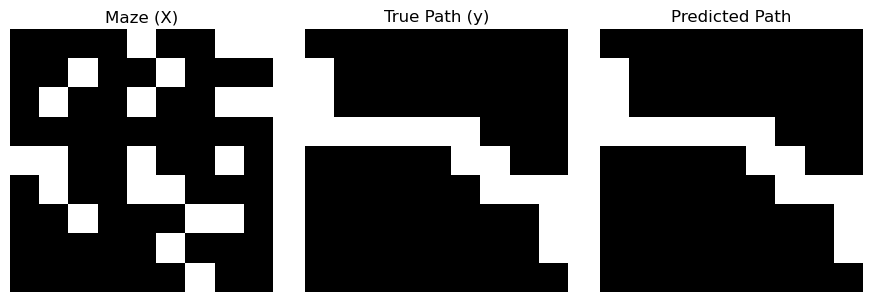

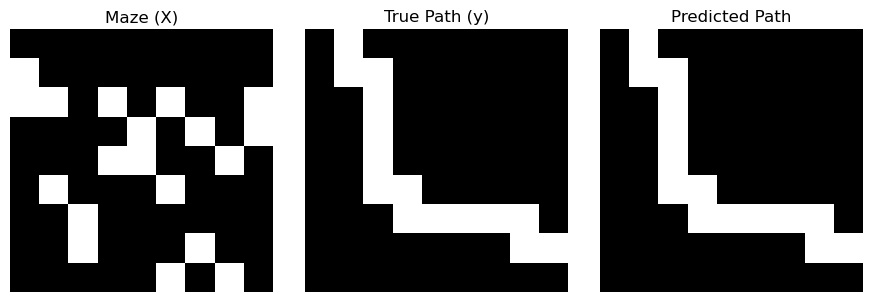

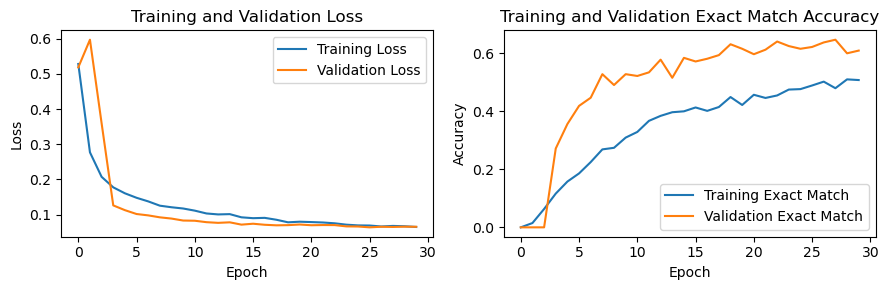

In [10]:
# Train and evaluate the model
model, history, X_test, y_test, predictions = train_and_evaluate(X, y, epochs=30, batch_size=8, num_samples=2)

# Plot the training history
plot_training_history(history)

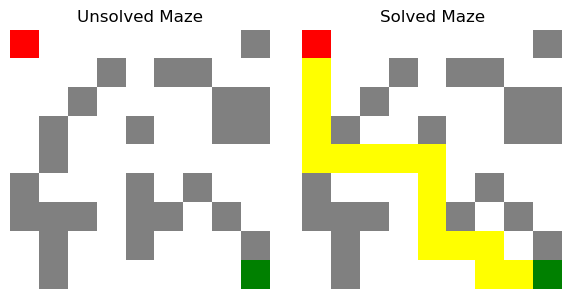

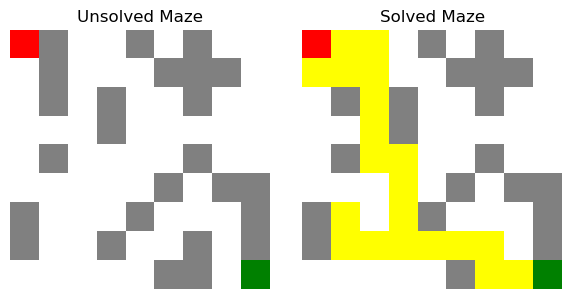

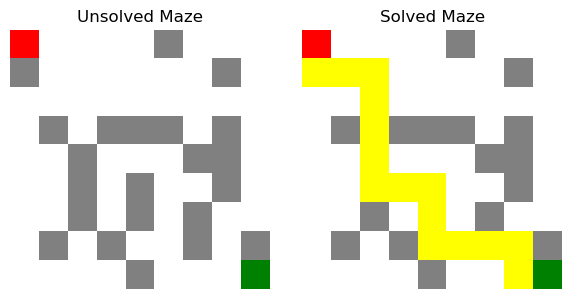

[[6.8882364e-06 1.3591864e-04 1.2257144e-04 3.2635446e-05 1.1625852e-05
  9.3985891e-06 4.1774907e-05 9.7262389e-05 4.5755910e-04]
 [9.9873251e-01 9.8882729e-01 9.9452651e-01 2.1934862e-05 9.1446276e-07
  3.2210122e-07 2.3000528e-06 1.0545942e-05 2.4988997e-04]
 [8.5885590e-04 1.3207850e-06 9.9442476e-01 9.8751996e-05 1.9845513e-05
  4.6036862e-06 8.7088856e-06 6.9687876e-06 6.2792457e-04]
 [1.3523953e-04 7.8788094e-07 9.9660367e-01 9.1408746e-04 2.3491713e-04
  2.3672353e-04 9.2314367e-05 2.0841416e-04 2.0991990e-03]
 [4.3318458e-05 3.7015513e-07 9.8379827e-01 1.3261993e-04 6.0725188e-07
  1.2025338e-04 2.6205133e-05 3.2935195e-04 5.0876122e-03]
 [2.7215114e-05 2.1303727e-05 9.8879552e-01 9.9512035e-01 9.9668986e-01
  5.7838051e-06 6.9055858e-08 2.5768352e-03 1.7003318e-03]
 [1.9941544e-05 5.3185122e-05 4.1351891e-03 2.8615148e-06 9.9407250e-01
  9.2624679e-05 2.7950962e-05 1.0074104e-02 2.2272896e-03]
 [9.4640061e-05 1.7965038e-04 2.9893755e-04 5.1678335e-06 9.9317616e-01
  9.9326146

In [ ]:
# Show some test maze
indices = [0, 1, 2]
for index in indices:
    X_sample = X_test[index]
    y_sample = y_test[index]
    y_pred = predictions[index] > 0.5
    y_raw = predictions[index]
    
    visualize_maze_comparison(X_sample, y_sample, y_pred)

print(y_raw[:, :, 0])
print(y_pred[:, :, 0])

In [12]:
real_maze_dir = 'real_dataset/mazes'

Converting 10 solution images to grids...


100%|██████████| 10/10 [00:00<00:00, 251.18it/s]


Conversion complete. Grids saved to real_dataset/grids
Loading dataset from: real_dataset/grids
Found 10 grid files
Using 10 from grid files


Loading grids: 100%|██████████| 10/10 [00:00<00:00, 7065.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Maze 1: Path found with 20 cells


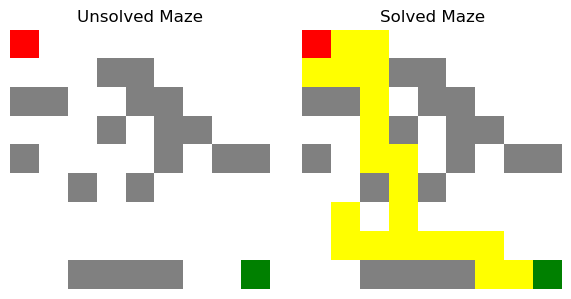

Maze 8: Path found with 15 cells


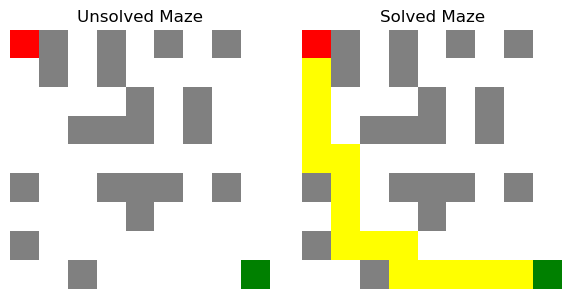

Maze 9: Path found with 15 cells


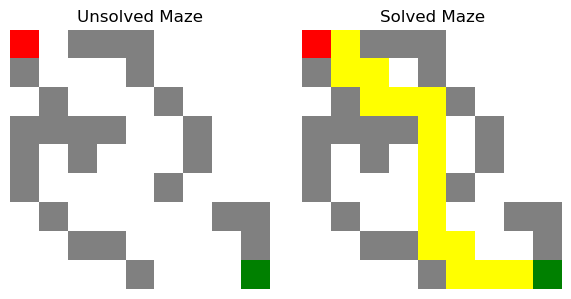

Maze 5: Path found with 15 cells


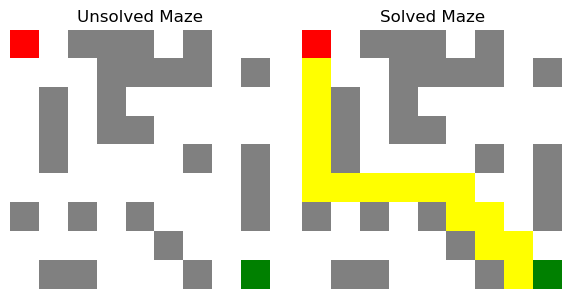

Maze 0: Path found with 15 cells


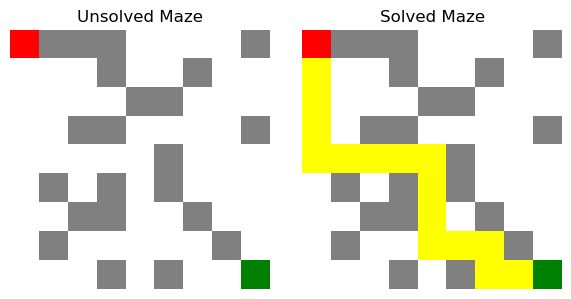

Maze 7: Path found with 15 cells


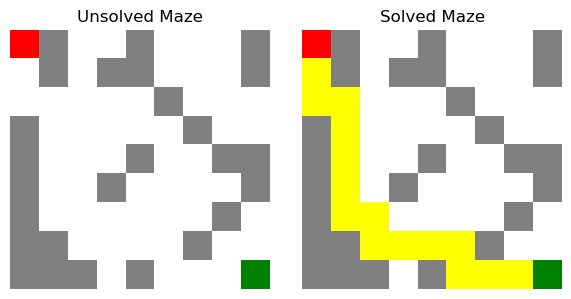

Maze 2: Path found with 15 cells


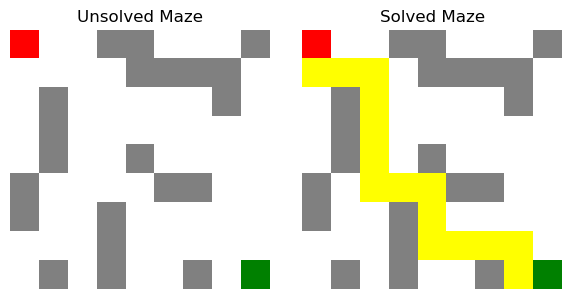

Maze 4: Path found with 15 cells


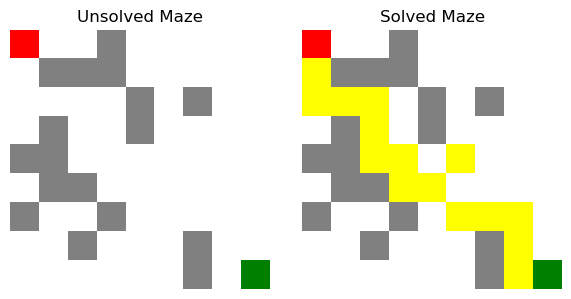

Maze 3: Path found with 15 cells


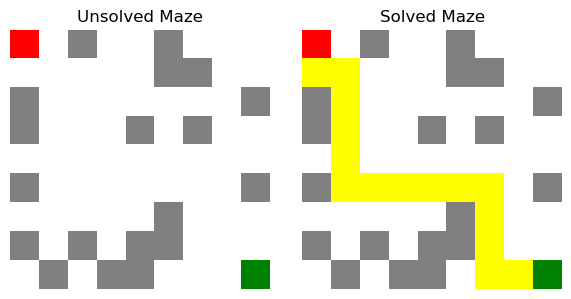

Maze 6: Path found with 16 cells


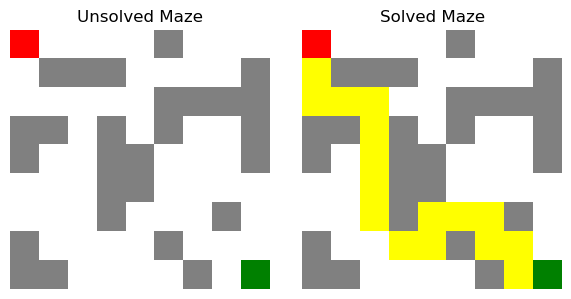

Selected maze: maze_6.npy
Shape of X_sample: (9, 9, 4)

Channel 0 (Walls):
[[0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0.]]

Channel 1 (Start):
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Channel 2 (End):
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Channel 3 (Empty):
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
# Diagnostic visualization
import matplotlib.pyplot as plt
import numpy as np

real_grids_dir = 'real_dataset/grids'
real_maze_dir = 'real_dataset/mazes'
#real_maze_dir = 'maze_dataset/solutions'

convert_and_save_solutions_to_grids(real_maze_dir, real_grids_dir)
X_real, _, grid_files = load_dataset_multichannel(real_grids_dir, num_grids=10)
predictions = model.predict(X_real)

# Create a new array of 10 random indices
indices = np.random.choice(len(X_real), 10, replace=False)

for i, index in enumerate(indices):
    X_sample_real = X_real[index]
    raw_pred = predictions[index]
    y_pred = raw_pred > 0.5
    
    # Check if there are any values above threshold
    if np.sum(y_pred) == 0:
        print(f"Maze {index}: No path found. Max prediction value: {np.max(raw_pred)}")
    else:
        print(f"Maze {index}: Path found with {np.sum(y_pred)} cells")
    
    visualize_maze_comparison(X_sample_real, np.zeros_like(y_pred), y_pred)
    plt.pause(0.5)

### Conclusion: 7/10 solved - good result!

# APPROACH 2

Here we worked on solving mazes with reinforcement learning, no need to generate data. It worked well!

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 5, 5, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,652 (76.77 KB)

 Trainable params: 19,652 (76.77 KB)

 Non-trainable params: 0 (0.00 B)

Episode: 1/10, Steps: 100, Epsilon: 0.69
Episode: 2/10, Steps: 100, Epsilon: 0.25
Episode: 3/10, Steps: 100, Epsilon: 0.09
Episode: 4/10, Steps: 100, Epsilon: 0.03
New best path found! Steps: 25
Episode: 5/10, Steps: 25, Epsilon: 0.03
Episode: 6/10, Steps: 43, Epsilon: 0.02
New best path found! Steps: 17
Episode: 7/10, Steps: 17, Epsilon: 0.01
Episode: 8/10, Steps: 18, Epsilon: 0.01
Episode: 9/10, Steps: 25, Epsilon: 0.01
Episode: 10/10, Steps: 100, Epsilon: 0.01
Best solution found: 17 steps
GIF saved as maze_solution.gif


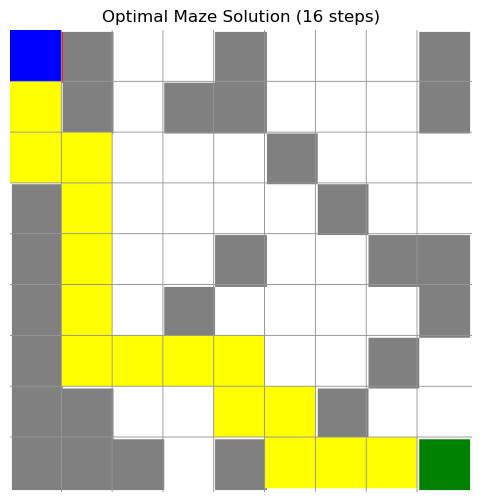

In [3]:
maze_path = "real_dataset/mazes/maze_1.png"
maze_rl = solve_maze(maze_path, training_episodes=10)